Exercise: Build a DNN with 20 hidden layers of 100 neurons each (that's too many, but it's the point of this exercise). Use He initialization and the ELU activation function.

In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))

Exercise: Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.

In [3]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [4]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [6]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [7]:
#!pip install tensorboard

In [8]:
#!pip3 show tensorboard

In [9]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [10]:
!kill 6372

kill: 6372: No such process


In [13]:
%tensorboard --logdir=c:\\users\\ma6114132\\PycharmProjects\\ml_practice\\training_deep_nn\\my_cifar10_logs --port=6006

In [12]:
model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)


Epoch 1/20
1407/1407 [==============================] - 12s 6ms/step - loss: 3.6437 - accuracy: 0.1721 - val_loss: 2.0976 - val_accuracy: 0.2402
Epoch 2/20
  19/1407 [..............................] - ETA: 8s - loss: 2.1282 - accuracy: 0.2188

C:\Users\ma6114132\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 [==============================] - 9s 6ms/step - loss: 2.0211 - accuracy: 0.2607 - val_loss: 1.9620 - val_accuracy: 0.2758
Epoch 3/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9123 - accuracy: 0.3005 - val_loss: 1.8811 - val_accuracy: 0.2994
Epoch 4/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8477 - accuracy: 0.3278 - val_loss: 1.8770 - val_accuracy: 0.3248
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7863 - accuracy: 0.3501 - val_loss: 1.7672 - val_accuracy: 0.3536
Epoch 6/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7383 - accuracy: 0.3699 - val_loss: 1.7321 - val_accuracy: 0.3602
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6912 - accuracy: 0.3832 - val_loss: 1.7107 - val_accuracy: 0.3786
Epoch 8/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6547 - accuracy: 0.4043 - val_loss: 1.6362 - val_accuracy: 0.4020
Epo

Exercise: Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

The code below is very similar to the code above, with a few changes:

I added a BN layer after every Dense layer (before the activation function), except for the output layer. I also added a BN layer before the first hidden layer.
I changed the learning rate to 5e-4. I experimented with 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3 and 3e-3, and I chose the one with the best validation performance after 20 epochs.
I renamed the run directories to run_bn_* and the model file name to my_cifar10_bn_model.h5

In [14]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/20
1407/1407 [==============================] - 24s 10ms/step - loss: 1.8465 - accuracy: 0.3376 - val_loss: 1.6529 - val_accuracy: 0.4118
Epoch 2/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6714 - accuracy: 0.4047 - val_loss: 1.5763 - val_accuracy: 0.4436
Epoch 3/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6008 - accuracy: 0.4306 - val_loss: 1.5369 - val_accuracy: 0.4496
Epoch 4/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5487 - accuracy: 0.4512 - val_loss: 1.4913 - val_accuracy: 0.4658
Epoch 5/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5080 - accuracy: 0.4640 - val_loss: 1.4239 - val_accuracy: 0.4916
Epoch 6/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4709 - accuracy: 0.4782 - val_loss: 1.4493 - val_accuracy: 0.4830
Epoch 7/20
1407/1407 [==============================] - 15s 10ms/step - loss: 1.4345 - accuracy: 0.4875 - val_loss: 1.4138 -

[1.3377814292907715, 0.5297999978065491]

Exercise: Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

In [16]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=10,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/10
1407/1407 [==============================] - 14s 7ms/step - loss: 1.9271 - accuracy: 0.3069 - val_loss: 1.8017 - val_accuracy: 0.3742
Epoch 2/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7126 - accuracy: 0.3953 - val_loss: 1.6735 - val_accuracy: 0.4052
Epoch 3/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.6181 - accuracy: 0.4308 - val_loss: 1.6342 - val_accuracy: 0.4318
Epoch 4/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5524 - accuracy: 0.4524 - val_loss: 1.6040 - val_accuracy: 0.4534
Epoch 5/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4951 - accuracy: 0.4735 - val_loss: 1.5597 - val_accuracy: 0.4630
Epoch 6/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4521 - accuracy: 0.4918 - val_loss: 1.5167 - val_accuracy: 0.4654
Epoch 7/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4099 - accuracy: 0.5077 - val_loss: 1.5013 - val_accuracy

[1.4750993251800537, 0.49320000410079956]

Exercise: Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

In [17]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=20,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/20
1407/1407 [==============================] - 14s 7ms/step - loss: 1.8958 - accuracy: 0.3271 - val_loss: 1.7390 - val_accuracy: 0.3960
Epoch 2/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6760 - accuracy: 0.4119 - val_loss: 1.6544 - val_accuracy: 0.4194
Epoch 3/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5826 - accuracy: 0.4460 - val_loss: 1.6480 - val_accuracy: 0.4298
Epoch 4/20
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5221 - accuracy: 0.4645 - val_loss: 1.6066 - val_accuracy: 0.4488
Epoch 5/20
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4622 - accuracy: 0.4901 - val_loss: 1.5864 - val_accuracy: 0.4686
Epoch 6/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4171 - accuracy: 0.5061 - val_loss: 1.5427 - val_accuracy: 0.4700
Epoch 7/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3689 - accuracy: 0.5230 - val_loss: 1.5171 - val_accu

[1.4660210609436035, 0.492000013589859]

Exercise: Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

In [18]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [20]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

352/352 [==============================] - 4s 9ms/step - loss: nan - accuracy: 0.1371


(9.999999747378752e-06,
 9.615227699279785,
 2.6770286560058594,
 4.157665457044329)

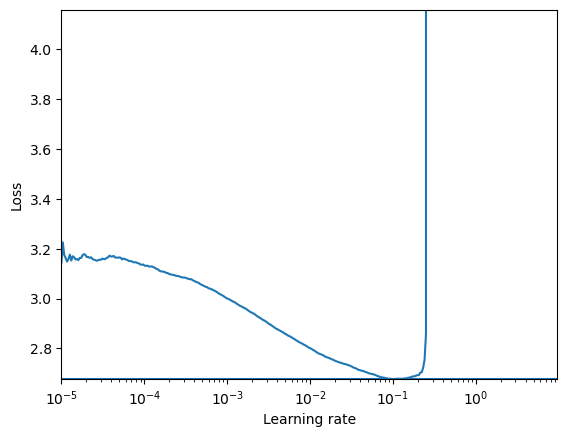

In [22]:
import math
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [23]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [25]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [26]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 4s 8ms/step - loss: 2.0702 - accuracy: 0.2755 - val_loss: 1.7708 - val_accuracy: 0.3596
Epoch 2/15
352/352 [==============================] - 3s 7ms/step - loss: 1.7748 - accuracy: 0.3705 - val_loss: 1.6709 - val_accuracy: 0.4064
Epoch 3/15
352/352 [==============================] - 3s 8ms/step - loss: 1.6346 - accuracy: 0.4191 - val_loss: 1.6324 - val_accuracy: 0.4228
Epoch 4/15
352/352 [==============================] - 3s 7ms/step - loss: 1.5480 - accuracy: 0.4519 - val_loss: 1.6184 - val_accuracy: 0.4260
Epoch 5/15
352/352 [==============================] - 3s 7ms/step - loss: 1.4943 - accuracy: 0.4695 - val_loss: 1.6650 - val_accuracy: 0.4358
Epoch 6/15
352/352 [==============================] - 3s 7ms/step - loss: 1.4550 - accuracy: 0.4820 - val_loss: 1.5920 - val_accuracy: 0.4498
Epoch 7/15
352/352 [==============================] - 3s 7ms/step - loss: 1.4124 - accuracy: 0.4983 - val_loss: 1.6103 - val_accuracy: 0.4542
Epoch 